In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Csv files/Chocolate Sales.csv')

In [ ]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')



Which salesperson generated the highest total sales revenue?

In [ ]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
sales_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
print(sales_by_person)


Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Castle         196616.0
Dotty Strutley         190624.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64


2. Which product is the top seller in terms of revenue?

In [ ]:
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
print(product_sales)


Product
19    349692.0
0     341712.0
21    329147.0
17    324842.0
10    312445.0
3     299796.0
2     299229.0
16    294700.0
20    293454.0
14    283969.0
5     277536.0
12    275541.0
13    269248.0
18    264740.0
4     261331.0
11    259147.0
9     256655.0
15    256144.0
6     249613.0
8     241486.0
7     231588.0
1     211610.0
Name: Amount, dtype: float64


What is the total sales revenue per country?

In [ ]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
print(country_sales)


Country
0    1137367.0
4    1051792.0
2    1045800.0
5    1035349.0
1     962899.0
3     950418.0
Name: Amount, dtype: float64


What’s the trend of sales month-wise?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month'] = df['Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Amount'].sum()
print(monthly_sales)

Month
April       674051.0
August      743148.0
February    699377.0
January     896105.0
July        803425.0
June        865144.0
March       749483.0
May         752892.0
Name: Amount, dtype: float64


5. What is the average revenue per box shipped?

In [ ]:
df['Revenue_per_box'] = df['Amount'] / df['Boxes Shipped']
average_revenue_per_box = df['Revenue_per_box'].mean()
print(average_revenue_per_box)


105.72020449539502


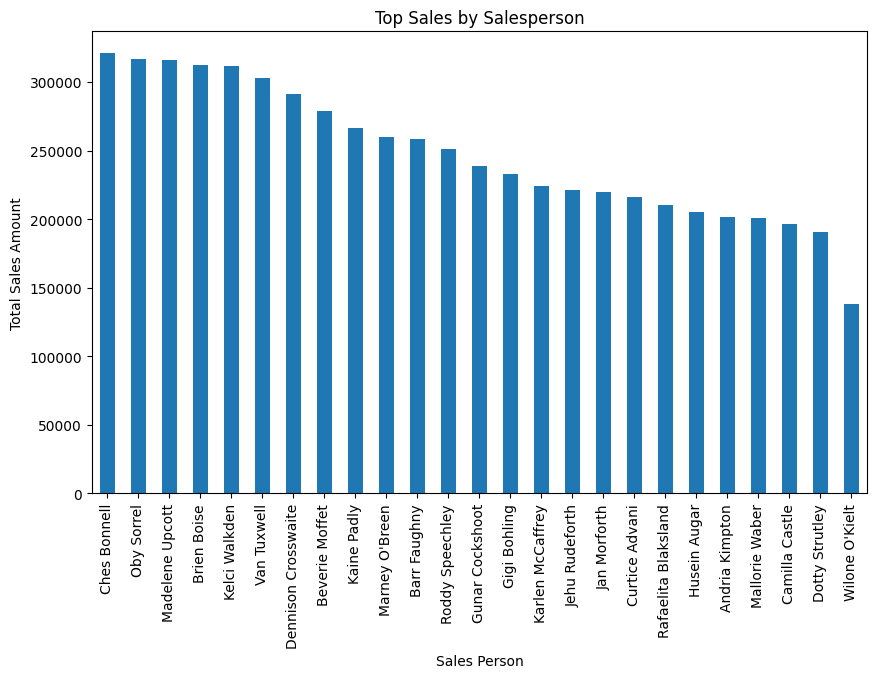

In [ ]:
# Top sales by salesperson
salesperson_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
salesperson_sales.plot(kind='bar', title='Top Sales by Salesperson', figsize=(10,6))
plt.ylabel('Total Sales Amount')
plt.show()

In [ ]:
# Feature Engineering
df['High_Sale'] = df['Amount'] > df['Amount'].median()
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Product'] = le.fit_transform(df['Product'])

In [ ]:
X = df[['Country', 'Product', 'Boxes Shipped']]
y = df['High_Sale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.5592705167173252


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Inspect the first few rows
print(df.head())


     Sales Person  Country  Product       Date   Amount  Boxes Shipped  \
0  Jehu Rudeforth        4       14 2022-01-04   5320.0            180   
1     Van Tuxwell        2        2 2022-08-01   7896.0             94   
2    Gigi Bohling        2       17 2022-07-07   4501.0             91   
3    Jan Morforth        0       17 2022-04-27  12726.0            342   
4  Jehu Rudeforth        4       17 2022-02-24  13685.0            184   

   High_Sale  
0       True  
1       True  
2      False  
3       True  
4       True  


In [ ]:
 #Data Preprocessing:
# 1. Convert Date column to datetime and extract month (optional)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [ ]:
# 2. Encode categorical variables: Sales Person, Country, and Product (target)
le_salesperson = LabelEncoder()
df['SalesPerson_enc'] = le_salesperson.fit_transform(df['Sales Person'])

le_country = LabelEncoder()
df['Country_enc'] = le_country.fit_transform(df['Country'])

le_product = LabelEncoder()
df['Product_enc'] = le_product.fit_transform(df['Product'])



In [ ]:
# 3. Select features and target variable
features = ['SalesPerson_enc', 'Country_enc', 'Amount', 'Boxes Shipped', 'Month']
target = 'Product_enc'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
target_names = list(map(str, le_product.inverse_transform(np.unique(y))))


report = classification_report(y_test, y_pred, target_names=target_names)

print("Model Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(report)

# Feature Importances
importances = pd.Series(clf.feature_importances_, index=features)
print("Feature Importances:")
print(importances.sort_values(ascending=False))


Model Accuracy: 1.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.08      0.07      0.07        14
           2       0.05      0.08      0.06        13
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        14
           6       0.07      0.06      0.07        16
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00        13
           9       0.03      0.06      0.04        16
          10       0.06      0.05      0.05        22
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         5
          16       0.00      0.00   

Decision Tree

In [ ]:

# Clean and preprocess data
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Encode categorical columns
le = LabelEncoder()
df['SalesPerson_enc'] = le.fit_transform(df['Sales Person'])
df['Country_enc'] = le.fit_transform(df['Country'])
df['Product_enc'] = le.fit_transform(df['Product'])

# Create sales category based on Amount
df['SalesCategory'] = pd.qcut(df['Amount'], q=3, labels=['Low', 'Medium', 'High'])

# Features and target
X = df[['Boxes Shipped', 'Month', 'DayOfWeek', 'SalesPerson_enc', 'Country_enc', 'Product_enc']]
y = df['SalesCategory']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.3221884498480243,
 '              precision    recall  f1-score   support\n\n        High       0.31      0.37      0.34       103\n         Low       0.31      0.25      0.27       106\n      Medium       0.34      0.35      0.35       120\n\n    accuracy                           0.32       329\n   macro avg       0.32      0.32      0.32       329\nweighted avg       0.32      0.32      0.32       329\n')

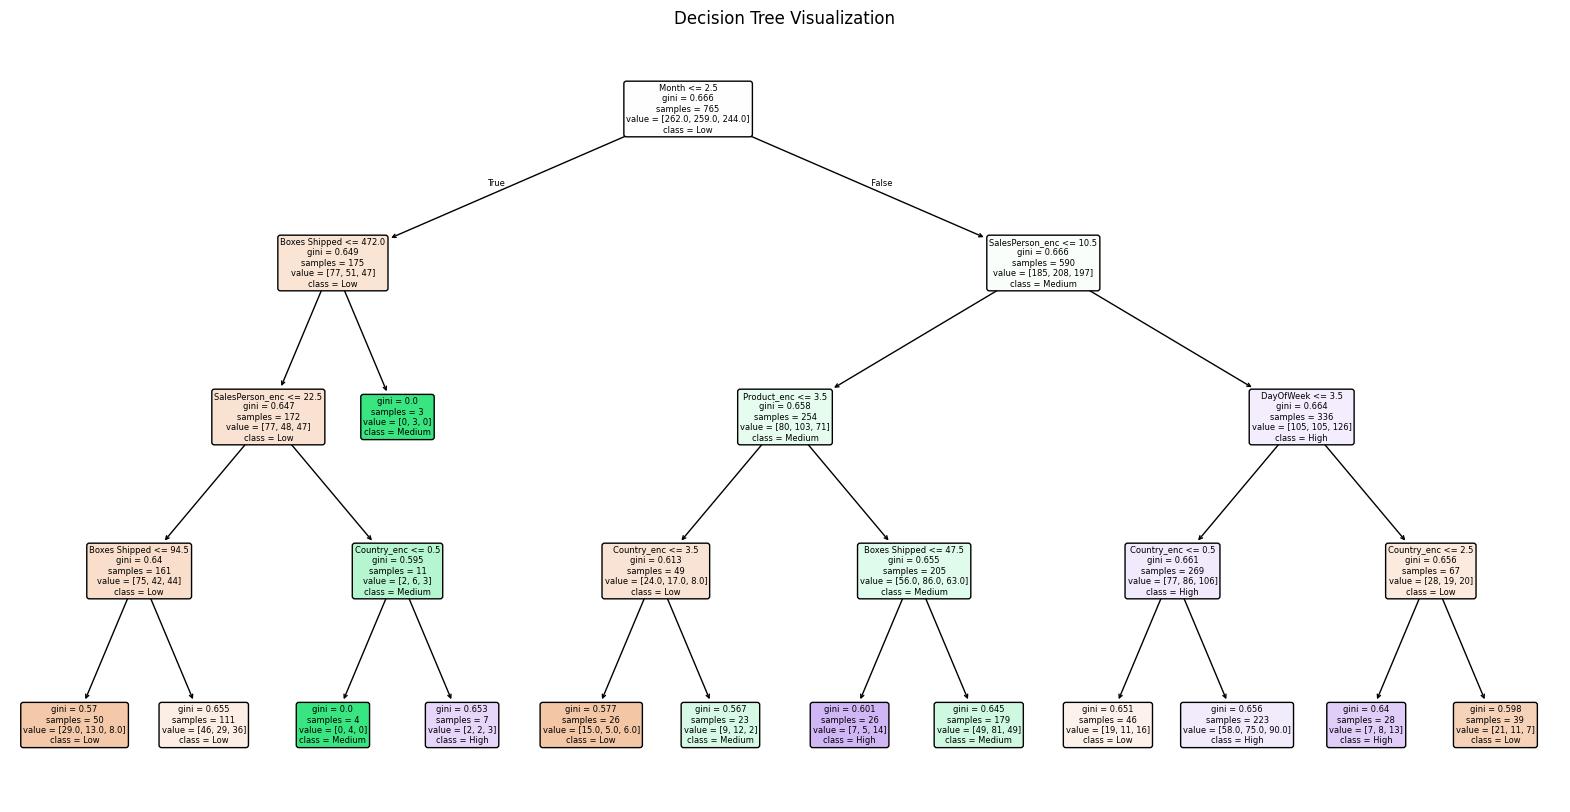

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
# Use clf (the trained model) instead of dt_classifier
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()